In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
xx = np.random.rand(3000) * 6
yy = np.random.rand(3000) * 6

In [3]:
X = np.c_[xx.ravel(), yy.ravel()]

In [4]:
X.shape

(3000, 2)

In [5]:
y = (xx * 2.1 - 3 - yy) > 0

In [6]:
y = y.astype(int)

In [7]:
X, y

(array([[5.57060333, 0.92161605],
        [3.15480821, 2.11426971],
        [5.31819351, 3.21518592],
        ...,
        [3.30137504, 0.99782328],
        [2.15323856, 1.54519448],
        [5.62825317, 4.38169611]]), array([1, 1, 1, ..., 1, 0, 1]))

In [8]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [9]:
X

array([[5.57060333, 0.92161605],
       [3.15480821, 2.11426971],
       [5.31819351, 3.21518592],
       ...,
       [3.30137504, 0.99782328],
       [2.15323856, 1.54519448],
       [5.62825317, 4.38169611]])

In [10]:
y = y[:, np.newaxis]

In [11]:
dataset = np.concatenate((X, y), axis = 1)
df = pd.DataFrame(dataset, columns=['X1','X2','Y'])
df.to_csv("synthetic.csv", index =False)

In [12]:
print(X.shape, y.shape)

(3000, 2) (3000, 1)


In [13]:
aa = list(range(len(df)))
import random
random.shuffle(aa)

train_idx = aa[0:int(0.5 * len(aa))]
query_idx = aa[int(0.5 * len(aa)): int(0.75 * len(aa))]
#val_idx = aa[int(0.65 * len(aa)): int(0.8 * len(aa))]
test_idx = aa[int(0.75 * len(aa)):]

In [14]:
train_df = df.iloc[train_idx]
query_df = df.iloc[query_idx]
#val_df = df.iloc[val_idx]
test_df = df.iloc[test_idx]

In [15]:
train_df.to_csv("synthetic_train.csv", index = False)
query_df.to_csv("synthetic_query.csv", index = False)
#val_df.to_csv("synthetic_val.csv", index = False)
test_df.to_csv("synthetic_test.csv", index= False)

In [24]:
sample_idx = aa[0:1000]
sample = dataset[sample_idx]

In [25]:
sample_positive = sample[np.where(sample[:,2] == 0)]
sample_negative = sample[np.where(sample[:,2] == 1)]

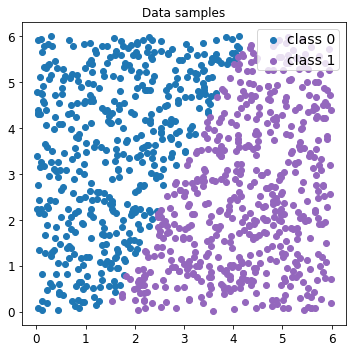

In [26]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', which='major', labelsize=12)
fig.set_size_inches(5, 5)
#ax.contour(xx, yy, y)
ax.scatter(sample_positive[:, 0], sample_positive[:, 1], c = '#1f77b4', label = "class 0")
ax.scatter(sample_negative[:, 0], sample_negative[:, 1],c = '#9467bd', label = "class 1")
#ax.legend(fongsize = 13)
ax.legend(loc = 'upper right', fontsize = 14, handletextpad = 0, columnspacing = 0, borderpad = 0.2)
ax.set_title("Data samples")
plt.tight_layout()
plt.savefig("dataset.pdf", dpi = 300)
plt.show()

In [27]:
print(sample_positive)

[[3.02927488 4.67847003 0.        ]
 [2.29827266 5.97908121 0.        ]
 [2.57919273 3.10791688 0.        ]
 ...
 [2.16977905 5.9116033  0.        ]
 [0.51840167 4.73045469 0.        ]
 [1.62160281 2.14103197 0.        ]]


In [28]:
np.save("sample_positive.npy", sample_positive)
np.save("sample_negative.npy", sample_negative)